# Feature Extraction

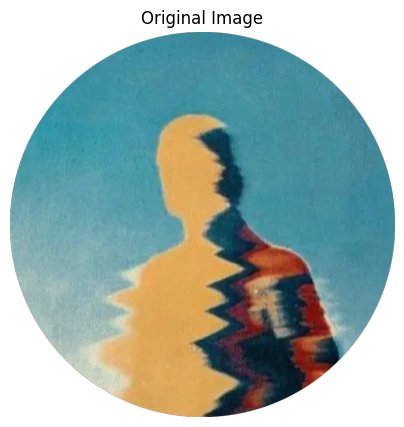

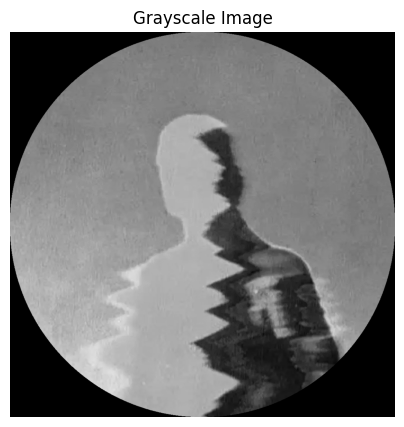

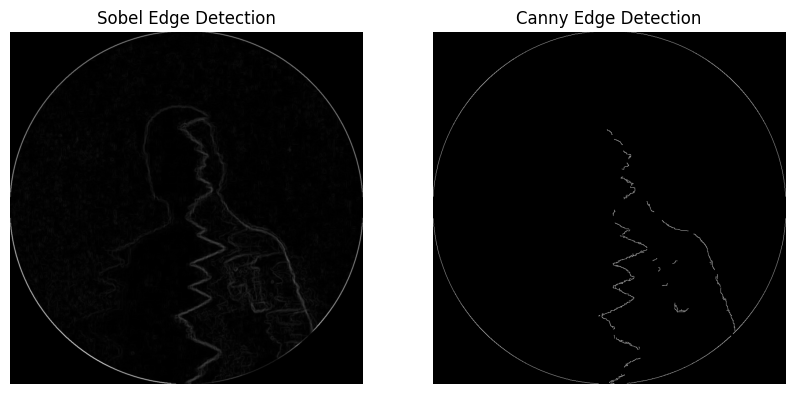

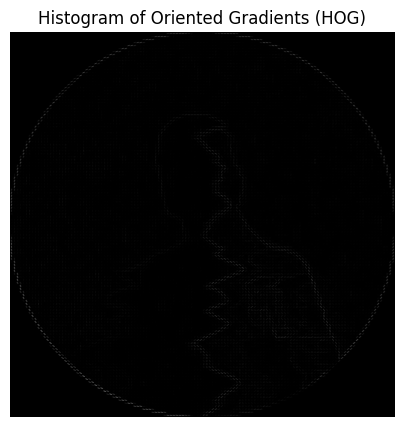

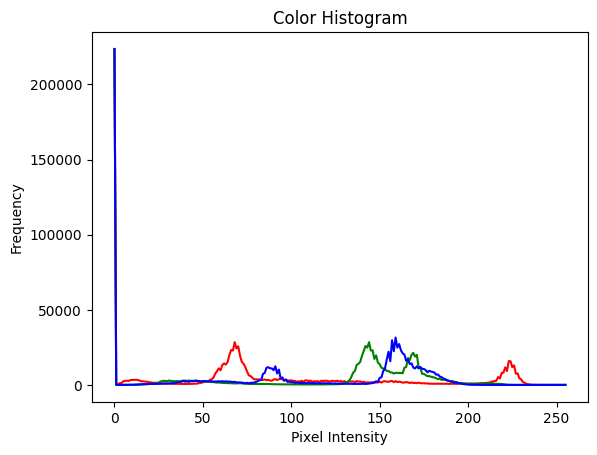

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


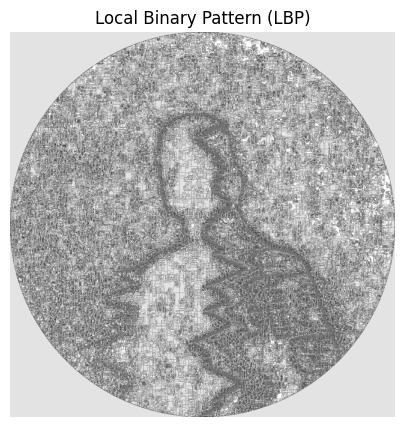

In [1]:
# Import the necessary libraries
import cv2  # OpenCV for image processing
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from skimage.color import rgb2gray
from PIL import Image

# Load and display the original image
img_path = 'sample.png'  # Replace with your image path
original_img = Image.open(img_path)
img = np.array(original_img)  # Convert to a NumPy array for processing

plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to RGB if it has an alpha channel (4 channels)
if img.shape[-1] == 4:
    img = img[..., :3]  # Remove the alpha channel

# Convert the image to grayscale
gray_img = rgb2gray(img)
plt.figure(figsize=(5, 5))
plt.title("Grayscale Image")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()


# Step 1: Edge Detection (Sobel and Canny)
# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)  # X-direction
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)  # Y-direction
sobel_edges = np.hypot(sobel_x, sobel_y)  # Magnitude of gradient

# Canny Edge Detection
canny_edges = cv2.Canny((gray_img * 255).astype(np.uint8), 100, 200)

# Display Sobel and Canny Edge Detection results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.show()

# Explanation:
# - Sobel Edge Detection detects intensity changes in x and y directions.
# - Canny Edge Detection is a multi-stage process that includes noise reduction, gradient calculation, and edge tracing.

# Step 2: Histogram of Oriented Gradients (HOG)
# HOG describes the structure of an image by capturing gradient orientations in localized portions.
hog_features, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                              visualize=True, block_norm='L2-Hys')

# Display HOG result
plt.figure(figsize=(5, 5))
plt.title("Histogram of Oriented Gradients (HOG)")
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.show()

# Explanation:
# - HOG is useful for capturing edge directions and the general shape of objects.
# - This is commonly used in object detection, as it provides a feature vector that describes the distribution of gradients.

# Step 3: Color Histogram
# A color histogram counts the frequency of each color channel in the image. This is useful for color-based classification.
color_hist = []
for i, color in enumerate(['r', 'g', 'b']):
    hist, bins = np.histogram(img[..., i], bins=256, range=(0, 256))
    color_hist.append(hist)
    plt.plot(bins[:-1], hist, color=color)

plt.title("Color Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Explanation:
# - A color histogram helps in understanding the color distribution in the image.
# - It is often used in image retrieval and classification where color plays an essential role.

# Step 4: Local Binary Pattern (LBP)
# LBP is a texture descriptor that labels pixels based on the relationship with their neighbors.
radius = 1  # Distance of neighboring pixels
n_points = 8 * radius  # Number of neighbors
lbp_image = local_binary_pattern(gray_img, n_points, radius, method="uniform")

# Display LBP result
plt.figure(figsize=(5, 5))
plt.title("Local Binary Pattern (LBP)")
plt.imshow(lbp_image, cmap="gray")
plt.axis('off')
plt.show()